# Clustering Analysis
The purpose of our cluster analysis is to:
<ol type = "a">
    <li>Measure clustering & central tendency.</li>
    <li>Perform k-means</li>
    <li>Evaluate the clusters, <b>particularly</b> how unhealthy vs healthy individuals cluster</li>
</ol>

In [68]:
from pyclustertend import ivat, vat
from sklearn.preprocessing import scale
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from pyclustertend import ivat
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Measure Cluster Tendency
Clustering algorithms such as k-means are used to determine the structure of multi-dimensional data. Clusters are natural disjoint groups. However, K-means will find clusters in data even if none "actually" exist. Therefore, a fundamentally question to ask before applying any clustering algorithms is : Are clusters present at all?
Ww will measure the clustering tendency of both the choice and reward datasets before subjecting it to k-means. To do this, we employ two methods:
- Hopkin's stastisic  of randomness
- VAT (visual assessment of tendency)

### Hopkins statistics
Hopkins statistics {cite:p}`banerjee2004validating` tests the spatial randomness of a dataset i.e. it measures the probability that a given dataset is generated by a uniform distribution. It is based on the difference between the distance from a real point to its nearest neighbor, U, and the distance from a uniformly generated point within the data space to the nearest real data point, W.

- $H_{0}$: The dataset **is** uniformly distributed 
- $H_{1}$: The dataset **is not** uniformly distributed 

$$
H = \frac{\sum_{i=1}^{m} u_{i}^{d}}{\sum_{i=1}^{m} u_{i}^{d} + \sum_{i=1}^{m} w_{i}^{d}}
$$

If the value of the hopkins statistic(H) is close to 1 (above 0.5), we reject $H_{0}$ and can conclude that the dataset is considered significantly clusterable.  Otherwise, we fail to reject $H_{0}$ and can conclude that the dataset is considered significantly uniformly distributed.

In [69]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [70]:
dim_reduced_choice = pd.read_csv('data/dim_reduced_choice.tsv', sep="\t")
dim_reduced_rewards = pd.read_csv('data/dim_reduced_rewards.tsv', sep="\t")


For both datasets, we reject $H_{0}$ and can conclude that both datasets have a significant tendency to cluster.

In [71]:
print(f"Choice's hopkins statistic {hopkins(dim_reduced_choice.iloc[:,2:])}")
print(f"Reward's hopkins statistic {hopkins(dim_reduced_rewards.iloc[:,2:])}") 

Choice's hopkins statistic 0.6499106435019358
Reward's hopkins statistic 0.7457061249530117


#### IVAT (visual assessment of tendency)
VAT is visual method of assessing the clustering likelihood of a dataset. VAT creates a minimum spanning tree of observations, where the pairwise distance between those observations is displayed as the black squares of an ordered dissimilarity square-shaped Map. The densely black squares on the diagonal can be understood as the number of clusters. The different shade of black provides insight on not only the numbers of clusters but, also the cluster hierarchy. **Note**, This algorithm is not a substitute for cluster evaluation metrics (Elbow, Silhouette coefficient). It merely suggests if clusters exist in the datasets, so as to avoid conducting cluster analysis on datasets in the first place. IVAT is just an improved version improved version of the VAT algorithm which produce more precise images but is more computational expensive.


**IVAT MAP of Choices**

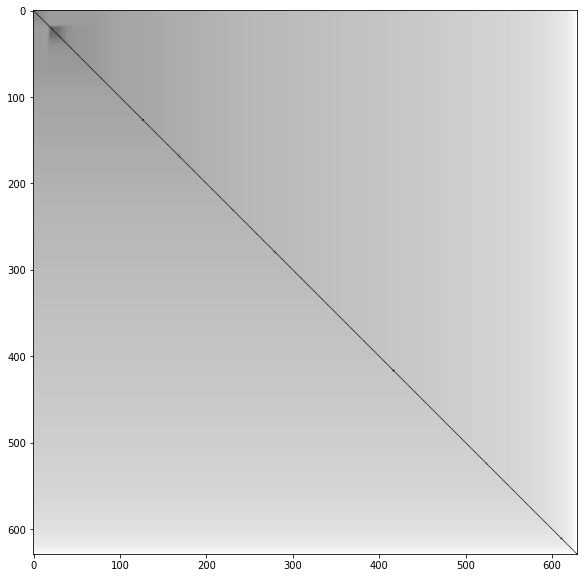

In [72]:
ivat(dim_reduced_choice.iloc[:,2:].values)



**IVAT MAP of Rewards**


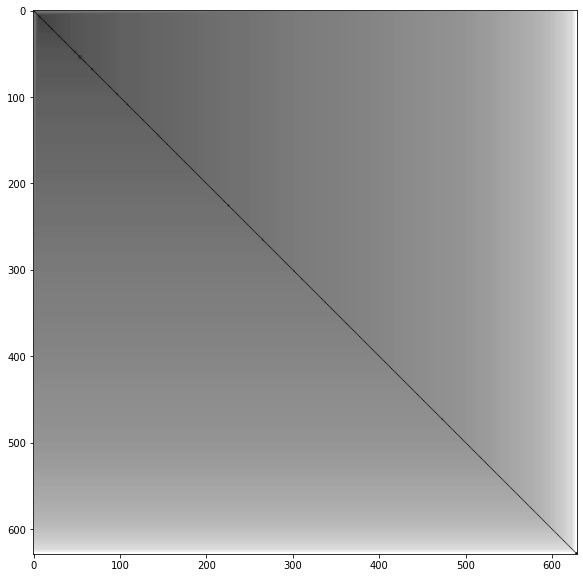

In [73]:
ivat(dim_reduced_rewards.iloc[:,2:].values)

From the result of implementing IVAT, it is observed from the maps produced are inconclusive for both datasets. However, as this algorithm is just meant to help us decide if we should go ahead with the cluster analysis or not, we will go ahead with the K-means cluster analysis as both hopkins stastic results were significant.

## K-Means

K-means is a common clustering algorithm. Although a simple clustering algorithm , it has wide application areas including in customer segmentation and Image compression. The main steps of this algorthim are
$$ \sum_{i=0}^{n} \min_{\mu_j \in C} (||x_i - \mu_j||^2) $$

But how do we find the correct number of clusters?

In [75]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);

SyntaxError: invalid syntax (Temp/ipykernel_35604/760097720.py, line 6)

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)